<a href="https://colab.research.google.com/github/xianranli/CHOICE_CLIPS/blob/main/CLIPS_illustration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this simulation case, two DNA segments ('*Query 1*' and '*Query 2*') were compared to a common DNA segment ('*Subject*'). For each pair of comparion, i.e., *Query 1* vs *Subject*, the shared sequence is indicated by a HSP (High-scoring pair segment) in Blast report. A large indel is indicated by two flanking HSPs. 

Adjusting the following parameters about the HSP and Indel to visualize the aligment and slope estimate difference due to varied HSP and Indel sizes.

In [8]:
### Size of HSPs
HSP1_q1_s <- 400 
HSP2_q1_s <- 500 
HSP1_q2_s <- 400 
HSP2_q2_s <- 500 

## Size of Indels
Indel_q1_s <- 1000
Indel_q2_s <- 1000
Indel_s_q1 <- 0
Indel_s_q2 <- 0

## Start coordinates
Start_q1_s <- 0
Start_q2_s <- 500
Start_s_q1 <- 0
Start_s_q2 <- 0

Plot the two alignments and slope estimates (Do not modify the next code block). 

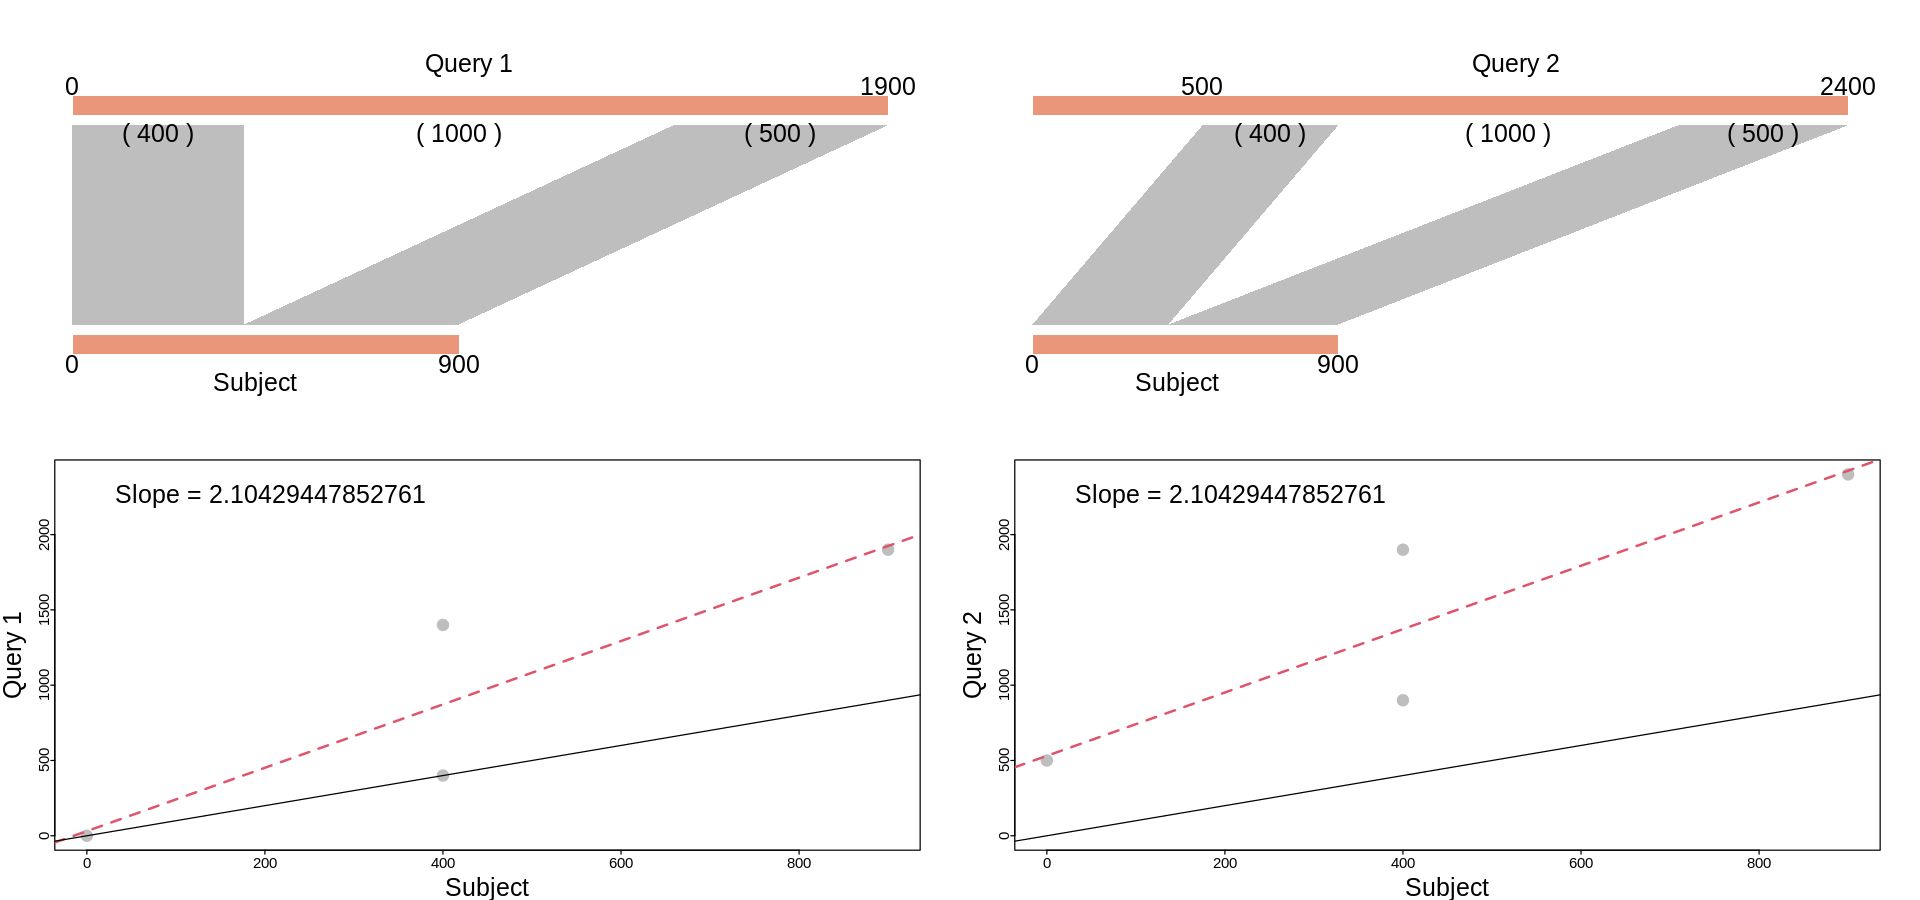

In [9]:
Q1_S <- c(Start_q1_s, HSP1_q1_s, Indel_q1_s, HSP2_q1_s)
Q2_S <- c(Start_q2_s, HSP1_q2_s, Indel_q2_s, HSP2_q2_s)
S_Q1 <- c(Start_s_q1, HSP1_q1_s, Indel_s_q1, HSP2_q1_s)
S_Q2 <- c(Start_s_q2, HSP1_q1_s, Indel_s_q2, HSP2_q2_s)
Q1_S_coords <- cumsum(Q1_S)
Q2_S_coords <- cumsum(Q2_S)
S_Q1_coords <- cumsum(S_Q1)
S_Q2_coords <- cumsum(S_Q2)
Coord_df <- data.frame(Q1_S = Q1_S_coords, S_Q1 = S_Q1_coords, Q2_S = Q2_S_coords, S_Q2 = S_Q2_coords)

options(repr.plot.width = 8 * 2, repr.plot.height = 3 * 2.5)
cex_ = 1.5
layout(matrix(1:4, byrow = F, nrow = 2))
for (j in 1:2) {
 par(mar = c(.5, 2, 0.5, 2) , mgp = c(1, 0.1, 0), tck = -0.01, cex.axis = .9, cex.lab = 1);
 Qs <- Coord_df[, j * 2 - 1]
 Ss <- Coord_df[, j * 2 - 0]
 delta_Qs <- diff(Qs)
 delta_Ss <- diff(Ss)
 plot(-100, -100, xlim = range(Qs, Ss), ylim = c(0.5, 2.5), xlab = '', ylab = '', bty = "n", xaxt = "n", yaxt = "n",)
 rect(1, 0.85, range(Ss)[2], 0.95, col = "darksalmon", border = "NA")
 rect(1, 2.05, range(Qs)[2], 2.15, col = "darksalmon", border = "NA")
 text(c(Ss[1], Ss[4]), c(1, 1) - 0.2, c(Ss[1], Ss[4]), cex = cex_)
 text(c(Qs[1], Qs[4]), c(2, 2) + 0.2, c(Qs[1], Qs[4]), cex = cex_)
 text(c(mean(Ss), mean(Qs)), c(0.7, 2.3), c('Subject', paste('Query', j)), cex = cex_)
 polygon(c(Ss[1], Ss[2], Qs[2], Qs[1]), c(1, 1, 2, 2), col = "grey", border = "NA")
 polygon(c(Ss[3], Ss[4], Qs[4], Qs[3]), c(1, 1, 2, 2), col = "grey", border = "NA")
 
 for (i in 1:3) {
  text(mean(Qs[0:1 + i]), 1.95, paste('(', delta_Qs[i], ')'),cex = cex_)

 }
 lm_ab <- lm(Qs ~ Ss)
 par(mar = c(2.5, 2.75, 0.5, 2) , mgp = c(1.5, 0.1, 0), tck = -0.01, cex.axis = .9, cex.lab = 1);

 plot(Ss, Qs, xlim = range(Ss), ylim = range(Coord_df[,c(1:3)]), xlab = 'Subject', ylab = paste('Query', j), pch = 19, col = "grey", cex = cex_, cex.lab = cex_)
 abline(lm_ab, col = 2, lty = 2, lwd = 2)
 abline(a = 0, b = 1, col = "black")
 legend("top", paste('Slope = ', lm_ab$coeff[2], sep = ''), bty = 'n', cex = cex_)
}


In the alignment plot (top row), each gray polygon indicates one HSP between the query and subject, while the white area indicates the large indel flanked by two HSPs. In the bottom row scatter plot, the red dashed line is the linear regression line of the grey dots, which has the x-y coordindate based on the HSPs, and the grey solid line is the diagonal line.